In [1]:
# Import numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# generate random data-set

np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + (np.random.rand(100, 1)-0.5)

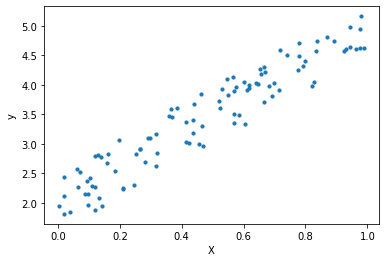

In [2]:
# Visualize the dataset

plt.scatter(X,y, s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# Add a column of ones to X (interception data)
X = np.c_[np.ones((X.shape[0], 1)), X]


# Store number of features (n_feature)
n_features = X.shape[1]

In [15]:
# Initialize a list to store losses during training
losses = []

# Initialize weights
weights = np.zeros((n_features, 1))

In [34]:
# Set learning rate to 0.00005 (lr)
lr = 0.0005

# Set number of epochs to 100 (n_iterations)
n_iterations = 500

Train the model

In [35]:
# Iterate over the number of iterations
for _ in range(n_iterations):
    # Predict the output
    y_pred = np.dot(X, weights)

    # Calculate the residuals (residuals = y_pred - y)
    residuals = y_pred - y

    # Calculate the gradient
    gradient_vector = np.dot(X.T, residuals)


    # Store loss (summ of residuals squared)
    loss = np.sum((residuals ** 2))
    losses.append(loss)

    # Update the weights
    #weights = weights - (lr*gradient_vector)
    weights -= lr*gradient_vector


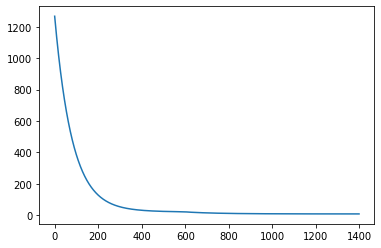

In [44]:
# Show losses
plt.plot(losses)

Evaluate the model

In [20]:
# Predict the y for all X values
y_pred = np.dot(X, weights)
def mean_squared_error(y, y_pred):
  diff = 0
  for i in range(len(y)):
    num = y[i] - y_pred[i]
    num **= 2
    diff += num
  diff /= len(y)
  return diff
print(mean_squared_error(y, y_pred))

# Implement mean squared error function:
# Given y and y_pred
# Calculate the squared differences between y and y_pred
# Return the mean of the squared differences
from sklearn.metrics import mean_squared_error as mse
print(mse(y, y_pred))


# Calculate the mean squared error



[3.83212837]
3.8321283745271724


Visualize the model

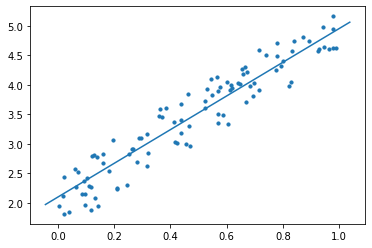

In [36]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)

plt.scatter(X[:,1:],y,s=10)
abline(slope=weights[1], intercept=weights[0])

In [ ]:
# Compare our mean_squared_error to sklearn

Use the model to predict an example value

In [37]:
test_value = 0.5
print(np.dot([1,test_value], weights))
print(test_value * weights[1] + weights[0])

[3.52692403]
[3.52692403]


OOP Aproach

In [45]:
# import linear model class
!python linear_regression.py
from linear_regression import LinearRegression

# Change jupyter settings to reload dependencies on change
%load_ext autoreload
%autoreload 2

python3: can't open file 'linear_regression.py': [Errno 2] No such file or directory


ModuleNotFoundError: ignored

In [48]:
import sys    
path_to_module = '/linear_regression.py'
sys.path.append(path_to_module)
from linear_regression import LinearRegression

# Initialize a LinearRegression object
model = linear_regression.LinearRegression(lr = 0.0005, n_iterations = 750)

# Fit the model
model.fit(X, y)

# Predict the y for all X values
prediction = model.predict(X)

# Evaluate the model
print(model)
predict_mse = mse(y, prediction)
print(predict_mse)

ModuleNotFoundError: ignored

In [ ]:
plt.plot(model.losses)